# Estudo da previsão da curva de contagios diários do covid-19 com regressão polinomial

### Projeto desenvolvido para prever a curva de evolução de contagios diários por covid-19 no Brasil. Desenvolvido apenas para estudo

In [1]:
""" 
Importando algumas das bibliotecas necessarias e editando as configurações de exposição de dados do pandas
(essa última serve somente para uma pré observação mais extensa dos dados) 
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [2]:
df = pd.read_csv('evo.csv', index_col=0, nrows=150) # Lendo o arquivo e exibindo_o
df.head()

,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
regiao,,,,,,,,,,,,,,,,
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


In [3]:
"""
O dataset está dividindo em várias regiões, sendo uma delas a que queremos, Brasil. Tiraremos a coluna regiao do indice e
filtraremos somente as linhas com regiao igual a Brasil, depois filtraremos algumas colunas que temos interesse. Faremos um 
segundo reset nos indices afim de usar essa nova coluna como a contagem dos dias de contagem e renomea-la.
"""

df.reset_index(inplace=True)
dfbr = df.drop(df[df.regiao != 'Brasil'].index)
dfbr = dfbr[['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]
dfbr.reset_index(inplace=True)
dfbr.rename(columns={'index': 'dia'}, inplace=True)
dfbr.tail()

,dia,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
140,140,1926824,41857,74133,1300
141,141,1966748,39924,75366,1233
142,142,2012151,45403,76688,1322
143,143,2046328,34177,77851,1163
144,144,2074860,28532,78772,921


In [4]:
"""
Dividiremos agora nossos dados em features e targets, sendo as targets o que queremos prever e as features variáveis das quais
nossa target deve depender no modelo.
"""

X = dfbr['dia'].values
Y = dfbr['casosNovos'].values

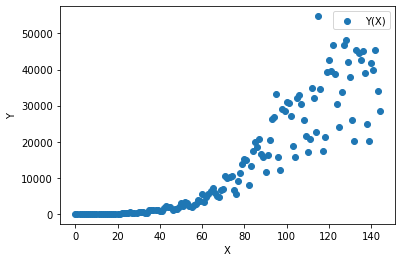

In [5]:
"""
Plotando as os contagios novos por dia vemos que ele parece desenhar um padrão, podemos então tentar definir uma função que
o acompanhe.
"""

plt.scatter(X,Y,label='Y(X)');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

In [6]:
"""
Utilizaremos o PolynomialFeatures para diferentes graus, analisaremos a curva visualmente e seus respectivos erros em relação
aos valores reais
"""

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Grau 2

In [7]:
caracteristicas_2 = PolynomialFeatures(degree=2)
X = X.reshape(-1, 1)
X_Polinomio_2 = caracteristicas_2.fit_transform(X)

In [8]:
modelo2 = LinearRegression()
modelo2.fit(X_Polinomio_2, Y)
Y_Polinomio_2 = modelo2.predict(X_Polinomio_2)

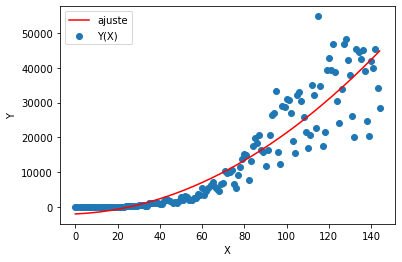

In [9]:
plt.scatter(X,Y,label = 'Y(X)');
plt.plot(X,Y_Polinomio_2, color='red', label='ajuste');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

### Grau 3

In [10]:
caracteristicas_3 = PolynomialFeatures(degree=3)
X = X.reshape(-1, 1)
X_Polinomio_3 = caracteristicas_3.fit_transform(X)

In [11]:
modelo3 = LinearRegression()
modelo3.fit(X_Polinomio_3, Y)
Y_Polinomio_3 = modelo3.predict(X_Polinomio_3)

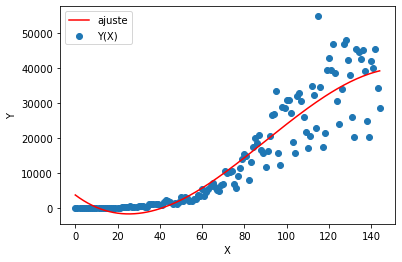

In [12]:
plt.scatter(X,Y,label = 'Y(X)');
plt.plot(X,Y_Polinomio_3, color='red', label='ajuste');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

### Grau 4

In [13]:
caracteristicas_4 = PolynomialFeatures(degree=4)
X = X.reshape(-1, 1)
X_Polinomio_4 = caracteristicas_4.fit_transform(X)

In [14]:
modelo4 = LinearRegression()
modelo4.fit(X_Polinomio_4, Y)
Y_Polinomio_4 = modelo4.predict(X_Polinomio_4)

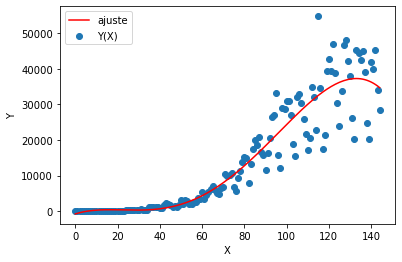

In [15]:
plt.scatter(X,Y,label = 'Y(X)');
plt.plot(X,Y_Polinomio_4, color='red', label='ajuste');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

### Grau 5

In [16]:
caracteristicas_5 = PolynomialFeatures(degree=5)
X = X.reshape(-1, 1)
X_Polinomio_5 = caracteristicas_5.fit_transform(X)

In [17]:
modelo5 = LinearRegression()
modelo5.fit(X_Polinomio_5, Y)
Y_Polinomio_5 = modelo5.predict(X_Polinomio_5)

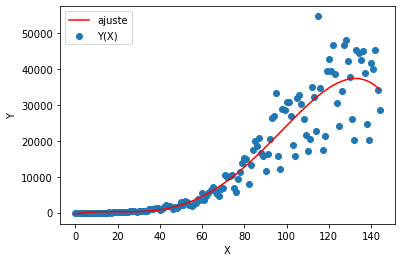

In [18]:
plt.scatter(X,Y,label = 'Y(X)');
plt.plot(X,Y_Polinomio_5, color='red', label='ajuste');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

### Grau 6

In [19]:
caracteristicas_6 = PolynomialFeatures(degree=6)
X = X.reshape(-1, 1)
X_Polinomio_6 = caracteristicas_6.fit_transform(X)

In [20]:
modelo6 = LinearRegression()
modelo6.fit(X_Polinomio_6, Y)
Y_Polinomio_6 = modelo6.predict(X_Polinomio_6)

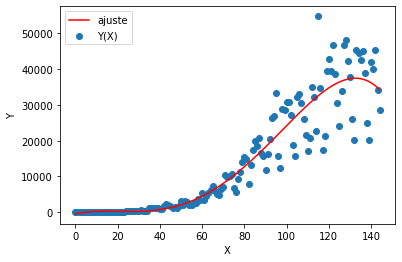

In [21]:
plt.scatter(X,Y,label = 'Y(X)');
plt.plot(X,Y_Polinomio_6, color='red', label='ajuste');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

### Grau 7

In [22]:
caracteristicas_7 = PolynomialFeatures(degree=7)
X = X.reshape(-1, 1)
X_Polinomio_7 = caracteristicas_7.fit_transform(X)

In [23]:
modelo7 = LinearRegression()
modelo7.fit(X_Polinomio_7, Y)
Y_Polinomio_7 = modelo7.predict(X_Polinomio_7)

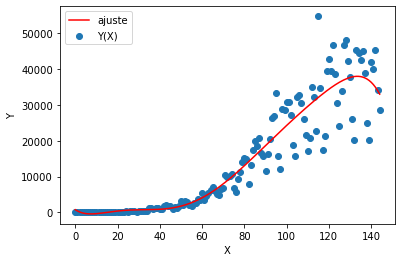

In [24]:
plt.scatter(X,Y,label = 'Y(X)');
plt.plot(X,Y_Polinomio_7, color='red', label='ajuste');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

### Cálculo de erros

In [25]:
"""
Vamos análisar os erros com o rmse e mae
"""

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
MAE2 = mean_absolute_error(Y,Y_Polinomio_2)
MAE3 = mean_absolute_error(Y,Y_Polinomio_3)
MAE4 = mean_absolute_error(Y,Y_Polinomio_4)
MAE5 = mean_absolute_error(Y,Y_Polinomio_5)
MAE6 = mean_absolute_error(Y,Y_Polinomio_6)
MAE7 = mean_absolute_error(Y,Y_Polinomio_7)

print("MAE (grau=2) = {:0.4f}".format(MAE2))
print("MAE (grau=3) = {:0.4f}".format(MAE3))
print("MAE (grau=4) = {:0.4f}".format(MAE4))
print("MAE (grau=5) = {:0.4f}".format(MAE5))
print("MAE (grau=6) = {:0.4f}".format(MAE6))
print("MAE (grau=7) = {:0.4f}".format(MAE7))

MAE (grau=2) = 4095.0322
MAE (grau=3) = 3872.4181
MAE (grau=4) = 3297.9439
MAE (grau=5) = 3272.2889
MAE (grau=6) = 3279.5738
MAE (grau=7) = 3265.6526


In [27]:
RMSE2 = np.sqrt(mean_squared_error(Y,Y_Polinomio_2))
RMSE3 = np.sqrt(mean_squared_error(Y,Y_Polinomio_3))
RMSE4 = np.sqrt(mean_squared_error(Y,Y_Polinomio_4))
RMSE5 = np.sqrt(mean_squared_error(Y,Y_Polinomio_5))
RMSE6 = np.sqrt(mean_squared_error(Y,Y_Polinomio_6))

print("RMSE (grau=2) = {:0.4f}".format(RMSE2))
print("RMSE (grau=3) = {:0.4f}".format(RMSE3))
print("RMSE (grau=4) = {:0.4f}".format(RMSE4))
print("RMSE (grau=5) = {:0.4f}".format(RMSE5))
print("RMSE (grau=6) = {:0.4f}".format(RMSE6))

RMSE (grau=2) = 6046.6923
RMSE (grau=3) = 5624.1877
RMSE (grau=4) = 5394.6710
RMSE (grau=5) = 5393.2012
RMSE (grau=6) = 5393.1255


### Predição

In [28]:
"""
Vamos testar todos os modelos e ver qual satisfaz melhor nossa situação
"""

l = list(range(0, 300)) # Aqui podemos definir um número de dias até onde queremos prever
predd = pd.DataFrame([l])
predd = pd.DataFrame(predd).T
predd.rename(columns={0: 'dia'}, inplace=True)
predd = predd['dia'].values
pred = predd.reshape(-1, 1)

In [29]:
pred_Polinomio = caracteristicas_3.fit_transform(pred)
predito3 = modelo3.predict(pred_Polinomio)
predito3 = pd.DataFrame([predito3]).T
predito3.rename(columns={0: 'casosAcumulado'}, inplace=True)
predito3 = predito3.drop(predito3[predito3.casosAcumulado < 0].index)

dfcompar = [predito3]
dfcompar = pd.concat(dfcompar)
dfcompar.reset_index(inplace=True)
dfcompar.rename(columns={'index': 'dia'}, inplace=True)

Xp3 = dfcompar['dia'].values
Y = dfcompar['casosAcumulado'].values


pred_Polinomio = caracteristicas_4.fit_transform(pred)
predito4 = modelo4.predict(pred_Polinomio)
predito4 = pd.DataFrame([predito4]).T
predito4.rename(columns={0: 'casosAcumulado'}, inplace=True)
predito4 = predito4.drop(predito4[predito4.casosAcumulado < 0].index) 

# Observe que a linha acima limita o valor ao mínimo zero, portanto, o gráfico não plotará os dias que seguem a partir disso

dfcompar = [predito4]
dfcompar = pd.concat(dfcompar)
dfcompar.reset_index(inplace=True)
dfcompar.rename(columns={'index': 'dia'}, inplace=True)

Xp4 = dfcompar['dia'].values
Y = dfcompar['casosAcumulado'].values


pred_Polinomio = caracteristicas_5.fit_transform(pred)
predito5 = modelo5.predict(pred_Polinomio)
predito5 = pd.DataFrame([predito5]).T
predito5.rename(columns={0: 'casosAcumulado'}, inplace=True)
predito5 = predito5.drop(predito5[predito5.casosAcumulado < 0].index)

dfcompar = [predito5]
dfcompar = pd.concat(dfcompar)
dfcompar.reset_index(inplace=True)
dfcompar.rename(columns={'index': 'dia'}, inplace=True)

Xp5 = dfcompar['dia'].values
Y = dfcompar['casosAcumulado'].values


pred_Polinomio = caracteristicas_6.fit_transform(pred)
predito6 = modelo6.predict(pred_Polinomio)
predito6 = pd.DataFrame([predito6]).T
predito6.rename(columns={0: 'casosAcumulado'}, inplace=True)
predito6 = predito6.drop(predito6[predito6.casosAcumulado < 0].index)

dfcompar = [predito6]
dfcompar = pd.concat(dfcompar)
dfcompar.reset_index(inplace=True)
dfcompar.rename(columns={'index': 'dia'}, inplace=True)

Xp6 = dfcompar['dia'].values
Y = dfcompar['casosAcumulado'].values


pred_Polinomio = caracteristicas_7.fit_transform(pred)
predito7 = modelo7.predict(pred_Polinomio)
predito7 = pd.DataFrame([predito7]).T
predito7.rename(columns={0: 'casosAcumulado'}, inplace=True)
predito7 = predito7.drop(predito7[predito7.casosAcumulado < 0].index)

dfcompar = [predito7]
dfcompar = pd.concat(dfcompar)
dfcompar.reset_index(inplace=True)
dfcompar.rename(columns={'index': 'dia'}, inplace=True)

Xp7 = dfcompar['dia'].values
Y = dfcompar['casosAcumulado'].values

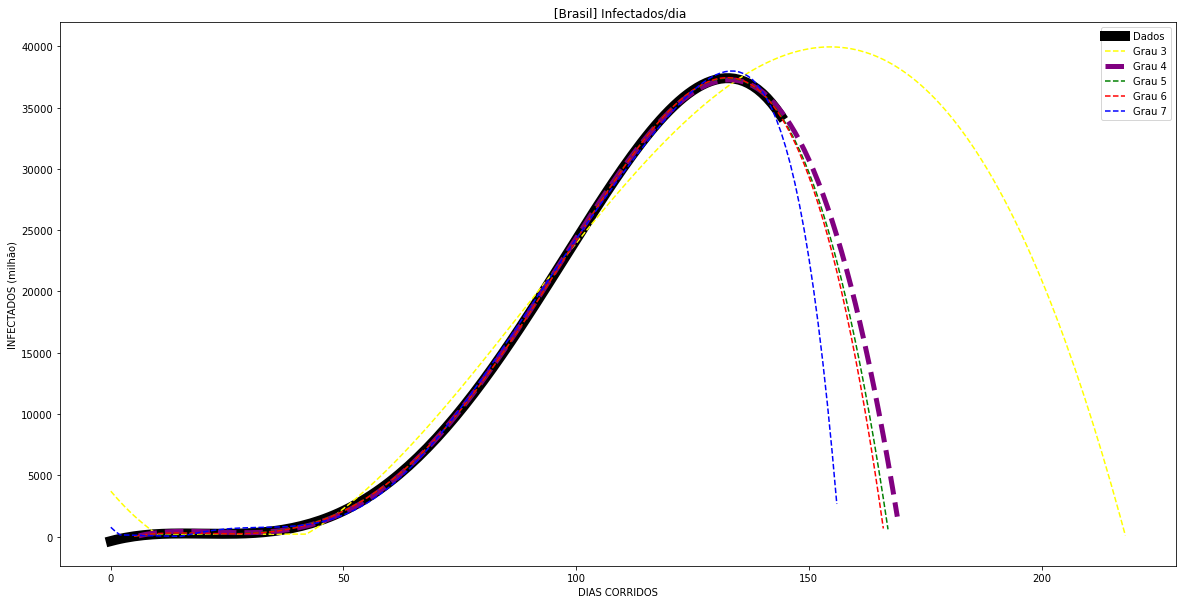

In [30]:
"""
E finalmente plotando nosso gráfico
"""

plt.figure(figsize=(20,10))

plt.plot(X,Y_Polinomio_5, color='black', label='Dados', linewidth=10);

plt.plot(Xp3,predito3, color='yellow', label='Grau 3', linestyle='dashed');

plt.plot(Xp4,predito4, color='purple', label='Grau 4', linestyle='dashed', linewidth=5);

plt.plot(Xp5,predito5, color='green', label='Grau 5', linestyle='dashed');

plt.plot(Xp6,predito6, color='red', label='Grau 6', linestyle='dashed');

plt.plot(Xp7,predito7, color='blue', label='Grau 7', linestyle='dashed');

plt.title(' [Brasil] Infectados/dia')
plt.xlabel('DIAS CORRIDOS');
plt.ylabel('INFECTADOS (milhão)');
plt.legend();

# Conclusão:

### Aparentemente as curva de grau 4, 5 e 6 foram as mais condizentes com a realidade dos dados já obitidos e, a partir mais ou menos do dia 145 podemos observar a previsão até o contágio chegar a zero casos diários. Relembrando que este é um modelo de estudo inicial, há modelos ainda que relacionam mais features à curva, chegando até a desenhar o platô, que seria a situação mais aceitável para tal.



In [31]:
from sklearn.externals import joblib # Aproveitando, salvarei o modelo para posspiveis futuros usos :) 

C:\Users\Mathe\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [32]:
joblib.dump(modelo4, 'model4.pkl')

['model4.pkl']